In [1]:
# From http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft
%matplotlib inline

In this example we use the Hilbert transform to determine the amplitude envelope and instantaneous frequency of an amplitude-modulated signal.

In [4]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ts = 1.0/fs
print ts

0.0025


We create a chirp of which the frequency increases from 20 Hz to 100 Hz and apply an amplitude modulation.

In [5]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= ( 1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

The amplitude envelope is given by magnitude of the analytic signal. The instantaneous frequency can be obtained by differentiating the instantaneous phase in respect to time. The instantaneous phase corresponds to the phase angle of the analytic signal.

In [6]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs

(0.0, 120.0)

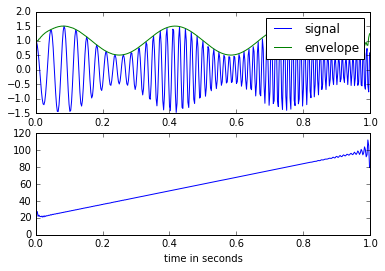

In [7]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

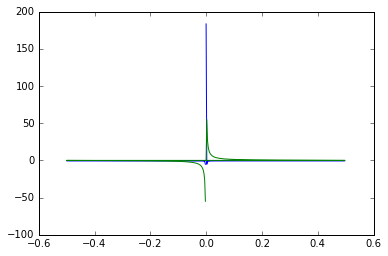

In [8]:
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

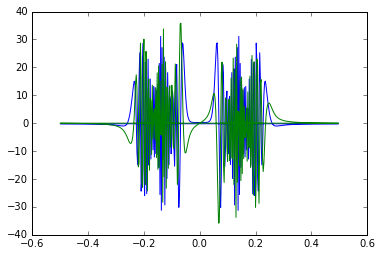

In [9]:
fsig = np.fft.fft(signal)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, fsig.real, freq, fsig.imag)

In [10]:
N = len(signal)
p = np.arange(N)
T = N/fs
fullfreq = p/T 
posfreq = fullfreq[range(N/2)]
print N,T,fs

400 1.0 400.0


In [11]:
Fsignal = np.fft.fft(signal)/N
Fsignal = Fsignal[range(N/2)]

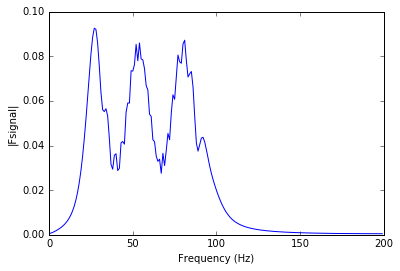

In [12]:
plt.plot(posfreq, abs(Fsignal), '-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Fsignal|')

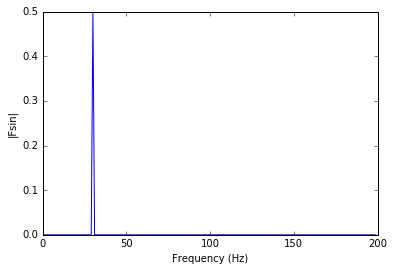

In [13]:
myfreq=30 # Hz
mysinw = np.sin(2*np.pi*myfreq*t)
Fsin = np.fft.fft(mysinw/N)
Fsin = Fsin[range(N/2)]
plt.plot(posfreq, abs(Fsin), '-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Fsin|')

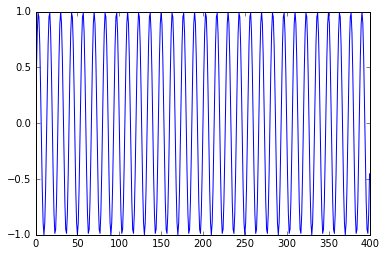

In [14]:
plt.plot(mysinw)

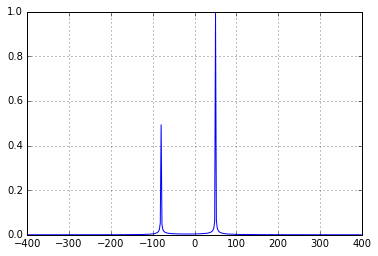

In [15]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

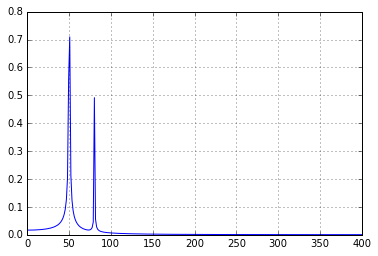

In [16]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

In [17]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ts = 1.0/fs

startfreq=20.0
endfreq=100.0
signal = chirp(t, startfreq, t[-1], endfreq)
carrierfreq=3.0
signal *= ( 1.0 + 0.5 * np.sin(2.0*np.pi*carrierfreq*t) )

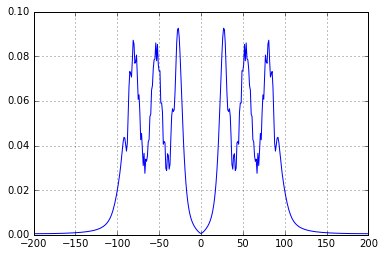

In [18]:
x = np.linspace(0.0,samples*ts,samples)
yf = fft(signal)
xf = fftfreq(samples, ts)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/samples * np.abs(yplot))
plt.grid()
plt.show()

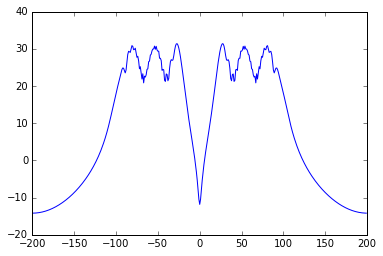

In [19]:
# Plot in dB
plt.plot(xf,20*np.log10(abs(yplot)))

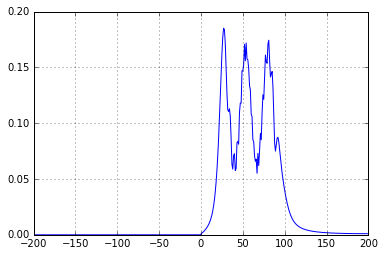

In [45]:
analytic_signal = hilbert(signal)
yf = fft(analytic_signal)
xf = fftfreq(samples, ts)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/samples * np.abs(yplot))
plt.grid()
plt.show()

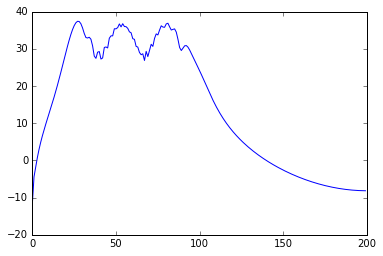

In [22]:
# Plot in dB
plt.plot(xf[200:400],20*np.log10(abs(yplot[200:400])))

In [23]:
print np.max(20*np.log10(abs(yplot))), np.argmax(20*np.log10(abs(yplot)))

37.3914893044 227


/programs/modeling/installdir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [24]:
 20*np.log10(abs(yplot[np.argmax(20*np.log10(abs(yplot)))]))

/programs/modeling/installdir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


37.391489304387378

/programs/modeling/installdir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/programs/modeling/installdir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


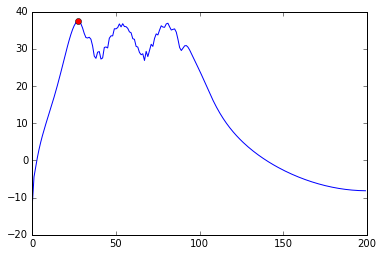

In [25]:
maxval = np.max(20*np.log10(abs(yplot)))
maxpt = np.argmax(20*np.log10(abs(yplot)))
# Plot in dB
plt.plot(xf[200:400],20*np.log10(abs(yplot[200:400])))
# Plot in dB
plt.plot(xf[maxpt],20*np.log10(abs(yplot[maxpt])),'ro')

37.3914893044 34.3914893044
[287] [ 32.54198988]
[64] [ 32.]


/programs/modeling/installdir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


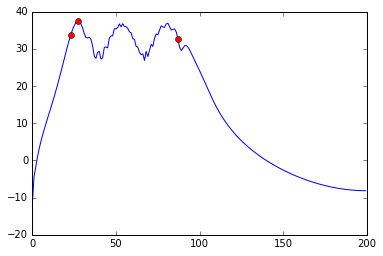

In [26]:
threedBdownval = maxval - 3
logyvals=20*np.log10(abs(yplot))
candidates=np.argwhere( (logyvals<threedBdownval) &(xf>0)& (logyvals>(threedBdownval-2.0)) )
print maxval, threedBdownval
print candidates[-1],logyvals[candidates[-1]]
# Plot in dB
plt.plot(xf[200:400],logyvals[200:400])
# Plot max
plt.plot(xf[maxpt],logyvals[maxpt],'ro')
# Plot 3dB down
plt.plot(xf[candidates[-1]],logyvals[candidates[-1]],'ro')
plt.plot(xf[candidates[0]],logyvals[candidates[0]],'ro')
bandwidth=candidates[-1]-candidates[0]
IF=bandwidth/2.0
print bandwidth, IF

In [46]:
# From whiteboard.ping.se/SDR/IQ (RF Down Converting to I/Q Data)
# Also http://www.qsl.net/w/w2aew//youtube/Basics_IQ_signals_modulation.pdf
# And https://www.youtube.com/watch?v=h_7d-m1ehoY

# Modulated Carrier RF = I*cos(2*pi*IF*t) - Q*sin(2*pi*IF*t)

# Transform back
# 0.5*I = lowpass(RF*cos(2*pi*IF*t))
# 0.5*Q = lowpass(RF*sin(2*pi*IF*t))

# Or demodulate using hilbert transform phase splitter
# p.7 of https://www.engr.colostate.edu/ECE423/lab07/Lab_Notes/Lab_Notes_7.pdf

In [89]:
fc=IF
A = analytic_signal
qamsig = np.real(A)*np.cos(2*np.pi*fc*t)
qamsig += np.imag(A)*-np.sin(2*np.pi*fc*t)

In [104]:
#phshiftsig=qamsig + 1j*hilbert(qamsig)
phshiftsig=hilbert(qamsig)
demodqamsig=phshiftsig*np.exp(-1j*2*np.pi*IF*t)

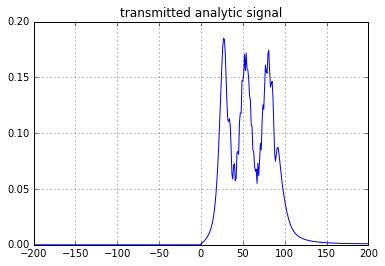

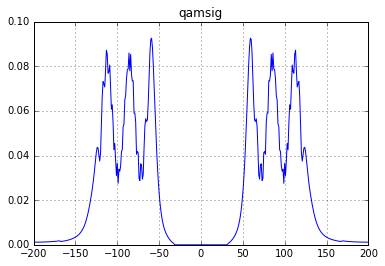

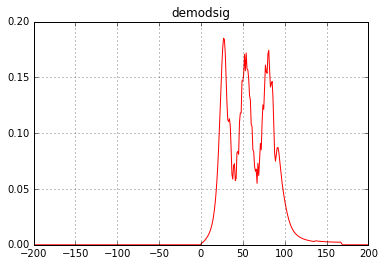

In [105]:
yf = fft(A)
xf = fftfreq(samples, ts)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/samples * np.abs(yplot))
plt.grid()
plt.title('transmitted analytic signal')
plt.show()

yf3 = fft(qamsig)
yplot3 = fftshift(yf3)

plt.plot(xf, 1.0/samples * np.abs(yplot3),'b-')
plt.grid()
plt.title('qamsig')
plt.show()

yf2 = fft(demodqamsig)
yplot2 = fftshift(yf2)

plt.plot(xf, 1.0/samples * np.abs(yplot2),'r-')
plt.grid()
plt.title('demodsig')
plt.show()



In [106]:
#separate demodsig into I and Q by just np.real(demodsig) and np.image(demodsig)

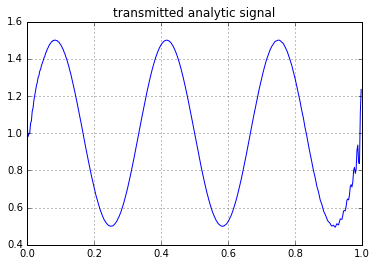

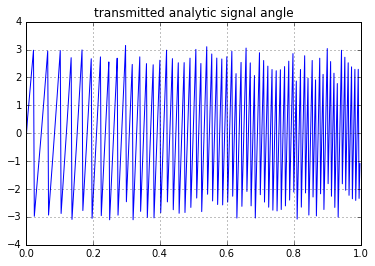

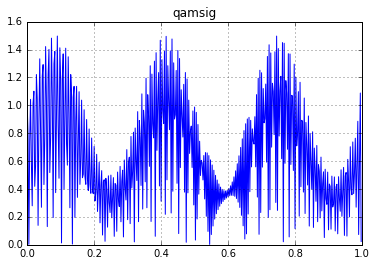

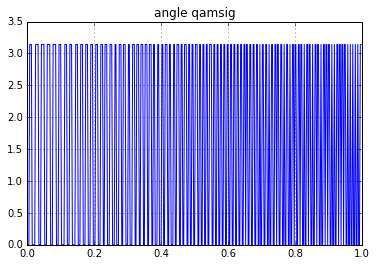

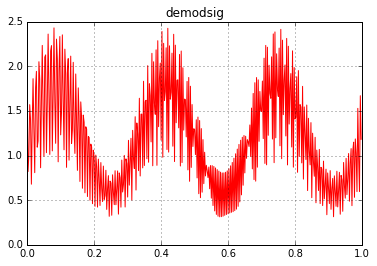

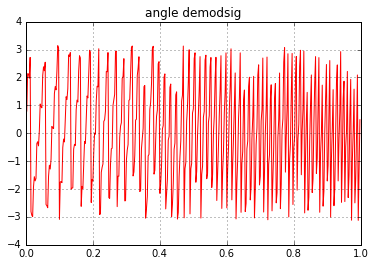

In [103]:
plt.plot(t,np.abs(A))
plt.grid()
plt.title('transmitted analytic signal')
plt.show()

plt.plot(t,np.angle(A))
plt.grid()
plt.title('transmitted analytic signal angle')
plt.show()

plt.plot(t, np.abs(qamsig),'b-')
plt.grid()
plt.title('qamsig')
plt.show()

plt.plot(t, np.angle(qamsig),'b-')
plt.grid()
plt.title('angle qamsig')
plt.show()

plt.plot(t, np.abs(demodqamsig),'r-')
plt.grid()
plt.title('demodsig')
plt.show()

plt.plot(t, np.angle(demodqamsig),'r-')
plt.grid()
plt.title('angle demodsig')
plt.show()